In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/laptop_battery_health_usage.csv')

In [3]:
df.sample(10)

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
39,LB040,Lenovo,2022,Windows,Programming,8,330,85,91,24,No,5
26,LB027,Dell,2019,Windows,Student,5,730,100,68,60,Yes,2
15,LB016,Lenovo,2023,Windows,Programming,8,220,85,94,18,No,5
17,LB018,Acer,2020,Windows,Student,4,560,95,79,48,No,3
27,LB028,Lenovo,2021,Windows,Programming,8,460,90,84,36,No,4
11,LB012,Acer,2019,Windows,Office,5,620,95,75,60,No,3
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
46,LB047,Asus,2021,Windows,Office,6,470,90,84,36,No,4
19,LB020,HP,2022,Windows,Office,6,310,90,89,24,No,4
32,LB033,Dell,2023,Windows,Office,6,210,85,96,18,No,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   device_id                 50 non-null     object
 1   brand                     50 non-null     object
 2   model_year                50 non-null     int64 
 3   os                        50 non-null     object
 4   usage_type                50 non-null     object
 5   daily_usage_hours         50 non-null     int64 
 6   charging_cycles           50 non-null     int64 
 7   avg_charge_limit_percent  50 non-null     int64 
 8   battery_health_percent    50 non-null     int64 
 9   battery_age_months        50 non-null     int64 
 10  overheating_issues        50 non-null     object
 11  performance_rating        50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB


In [7]:
df.describe()

,model_year,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,performance_rating
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2020.560000,6.600000,526.400000,92.100000,80.16000,42.240000,3.580000
std,1.567007,1.498298,220.405563,6.857887,11.83278,18.118161,1.144463
min,2018.000000,4.000000,180.000000,80.000000,55.00000,12.000000,1.000000
25%,2019.250000,6.000000,342.500000,85.000000,72.50000,25.500000,3.000000
50%,2021.000000,6.000000,495.000000,90.000000,82.50000,38.000000,4.000000
75%,2022.000000,8.000000,695.000000,100.000000,90.00000,58.500000,4.750000
max,2023.000000,10.000000,950.000000,100.000000,98.00000,72.000000,5.000000


In [8]:
df.columns.tolist()

['device_id',
 'brand',
 'model_year',
 'os',
 'usage_type',
 'daily_usage_hours',
 'charging_cycles',
 'avg_charge_limit_percent',
 'battery_health_percent',
 'battery_age_months',
 'overheating_issues',
 'performance_rating']

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

In [14]:
num_cols = df.select_dtypes(include=np.number).columns


In [17]:
col = "daily_usage_hours"
q1, q3 = df[col].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
outliers = df[(df[col] < lower) | (df[col] > upper)]

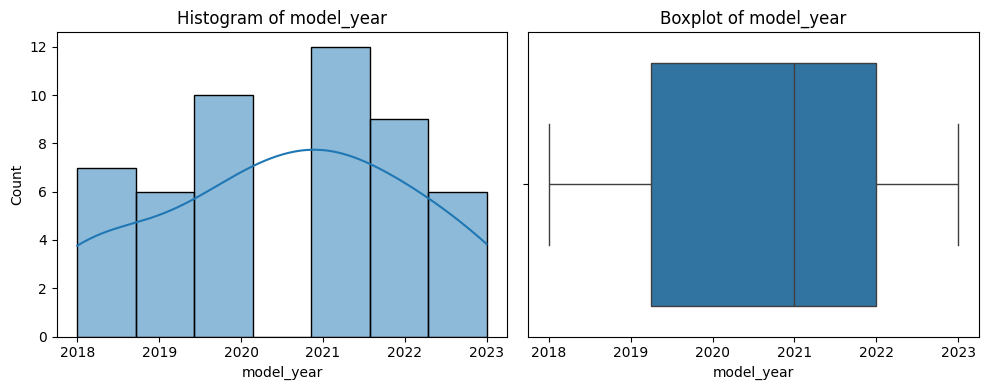

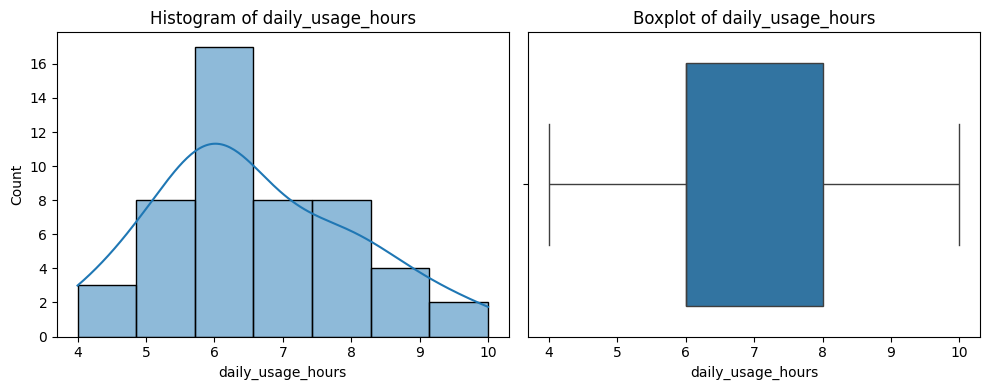

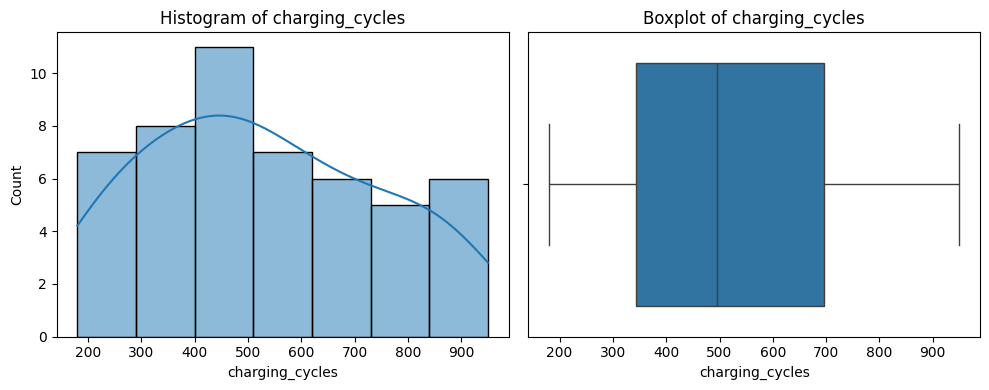

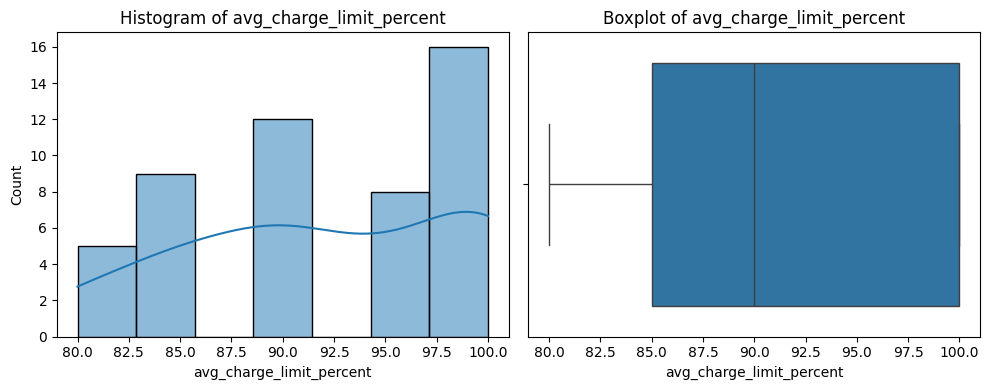

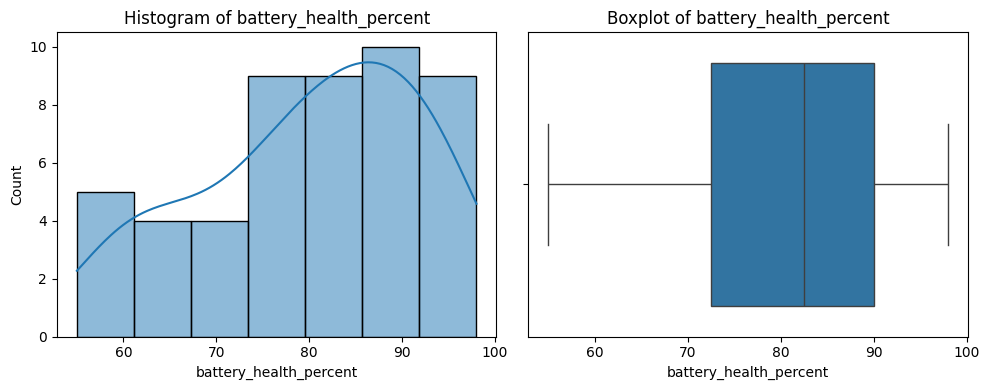

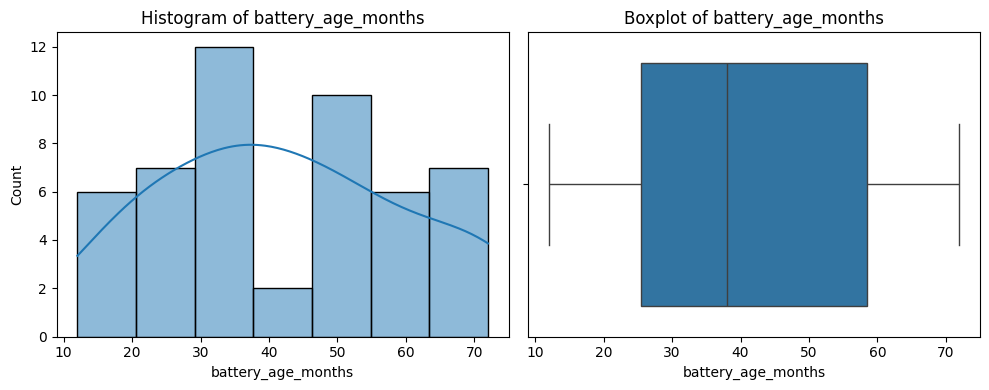

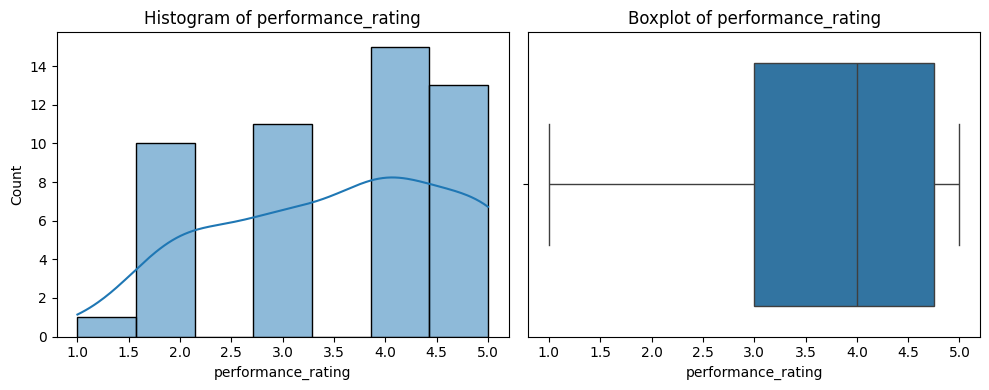

In [18]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

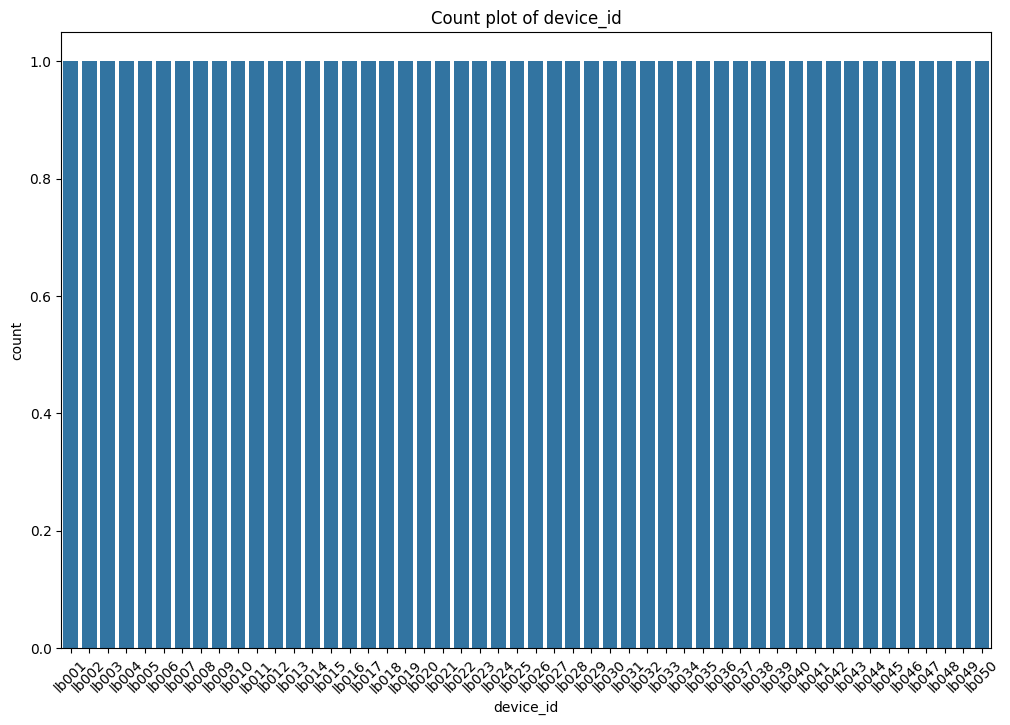

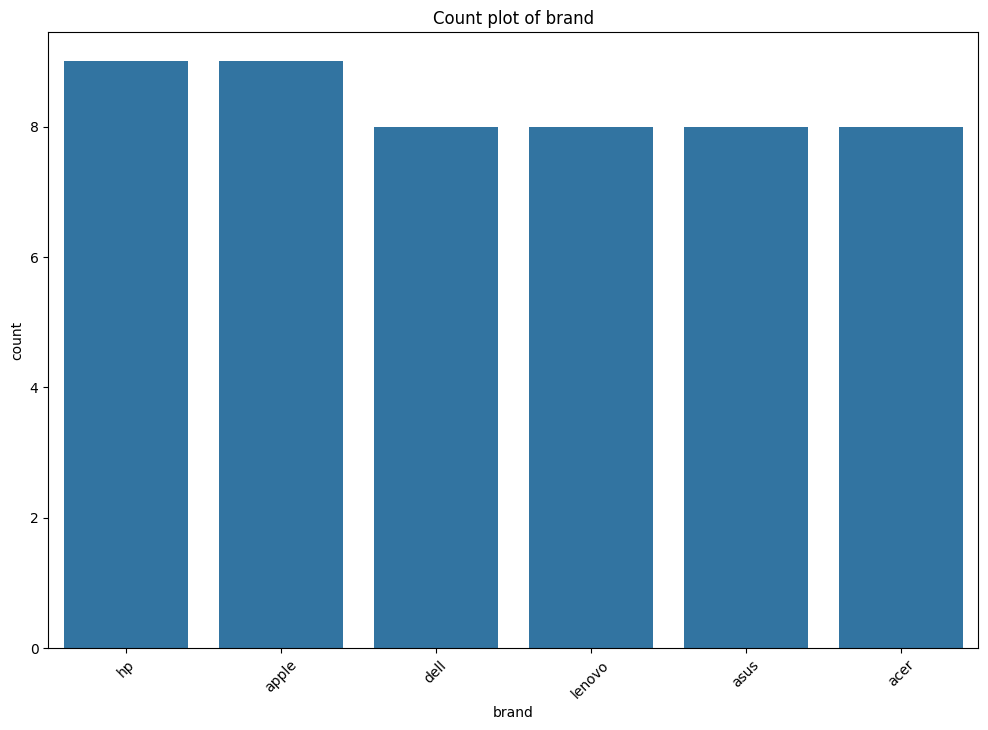

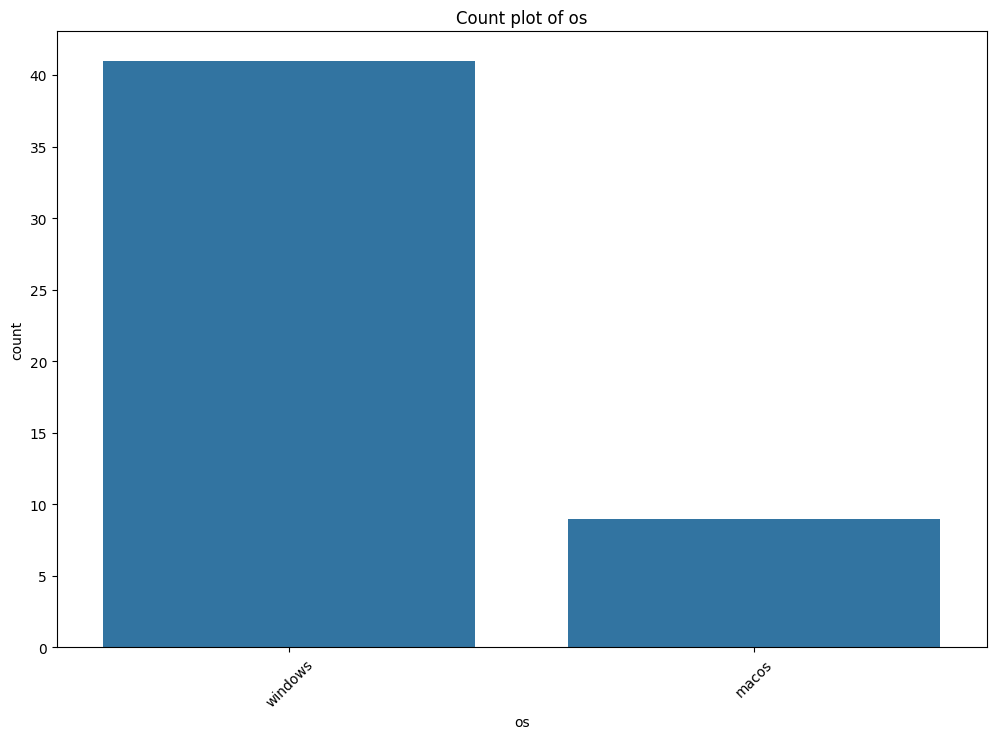

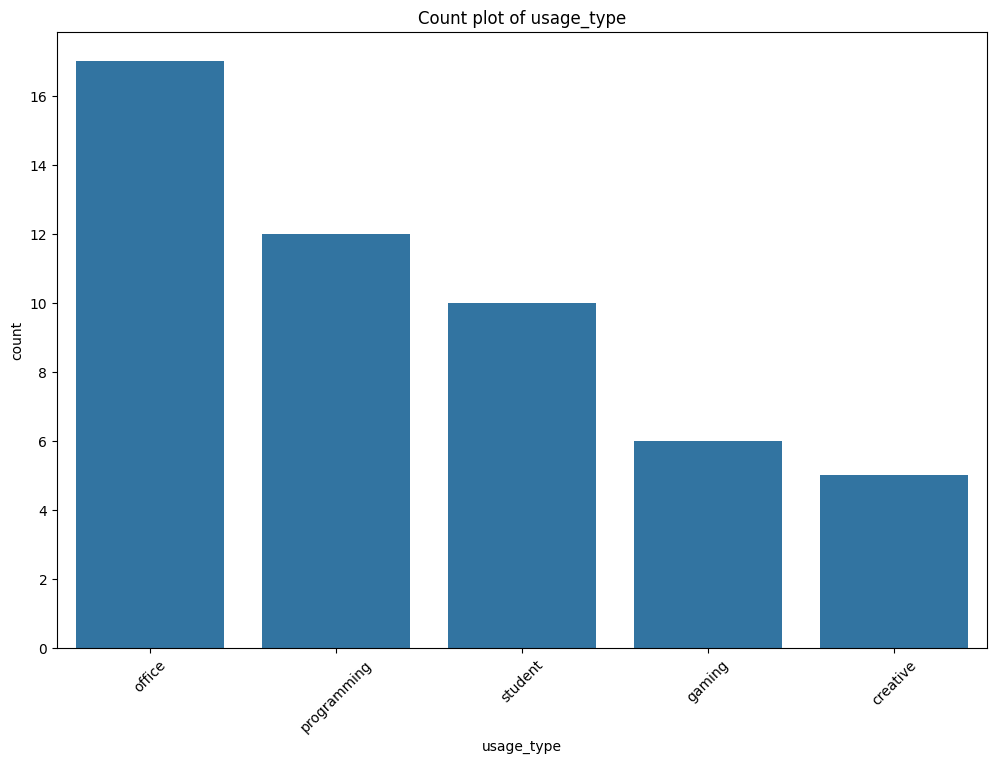

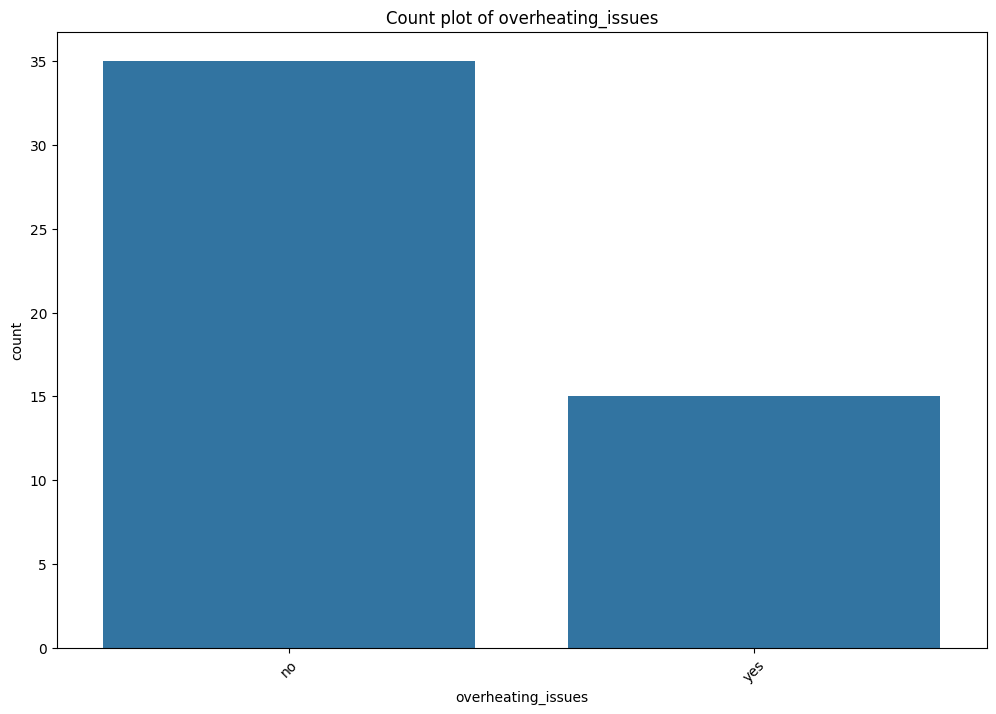

In [21]:
for col in cat_cols:
    plt.figure(figsize=(12,8))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.xticks(rotation=45)
    plt.title(f"Count plot of {col}")
    plt.show()

In [22]:
df[num_cols].agg(["mean", "median", "min", "max"])
for col in cat_cols:
    print(col, ":", df[col].value_counts(normalize=True).round(3))

device_id : device_id
lb001    0.02
lb002    0.02
lb003    0.02
lb004    0.02
lb005    0.02
lb006    0.02
lb007    0.02
lb008    0.02
lb009    0.02
lb010    0.02
lb011    0.02
lb012    0.02
lb013    0.02
lb014    0.02
lb015    0.02
lb016    0.02
lb017    0.02
lb018    0.02
lb019    0.02
lb020    0.02
lb021    0.02
lb022    0.02
lb023    0.02
lb024    0.02
lb025    0.02
lb026    0.02
lb027    0.02
lb028    0.02
lb029    0.02
lb030    0.02
lb031    0.02
lb032    0.02
lb033    0.02
lb034    0.02
lb035    0.02
lb036    0.02
lb037    0.02
lb038    0.02
lb039    0.02
lb040    0.02
lb041    0.02
lb042    0.02
lb043    0.02
lb044    0.02
lb045    0.02
lb046    0.02
lb047    0.02
lb048    0.02
lb049    0.02
lb050    0.02
Name: proportion, dtype: float64
brand : brand
hp        0.18
apple     0.18
dell      0.16
lenovo    0.16
asus      0.16
acer      0.16
Name: proportion, dtype: float64
os : os
windows    0.82
macos      0.18
Name: proportion, dtype: float64
usage_type : usage_type
office     

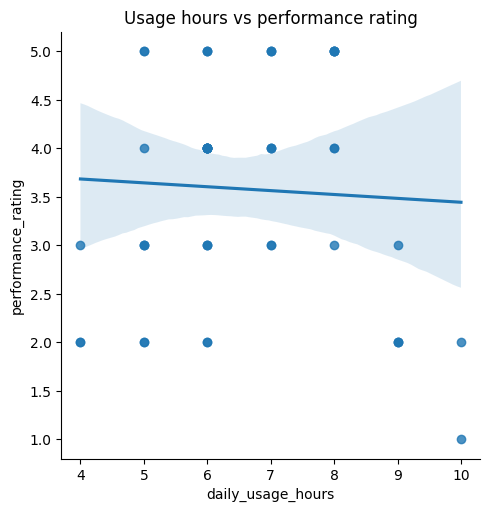

In [23]:
target = "performance_rating"  # adjust to your problem

# Numeric vs numeric: scatter + regression
sns.lmplot(data=df, x="daily_usage_hours", y=target, height=5)
plt.title("Usage hours vs performance rating")
plt.show()

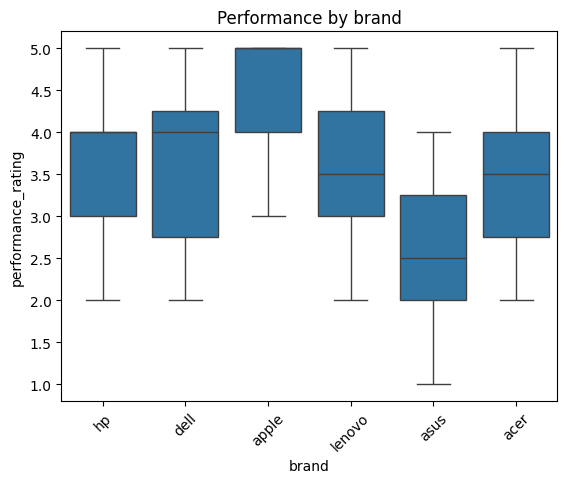

In [24]:
sns.boxplot(data=df, x="brand", y=target)
plt.xticks(rotation=45)
plt.title("Performance by brand")
plt.show()

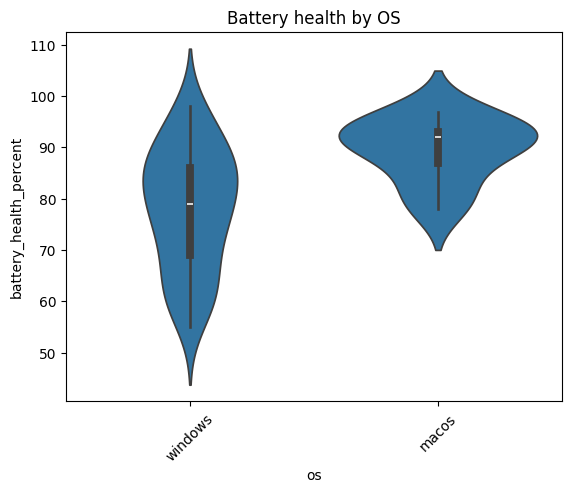

In [25]:
sns.violinplot(data=df, x="os", y="battery_health_percent")
plt.xticks(rotation=45)
plt.title("Battery health by OS")
plt.show()

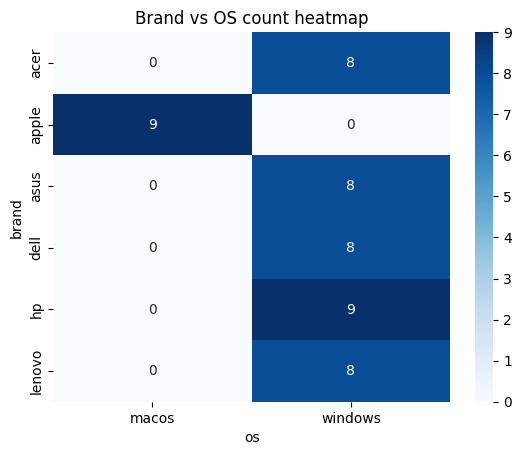

In [26]:
ct = pd.crosstab(df["brand"], df["os"])
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Brand vs OS count heatmap")
plt.show()

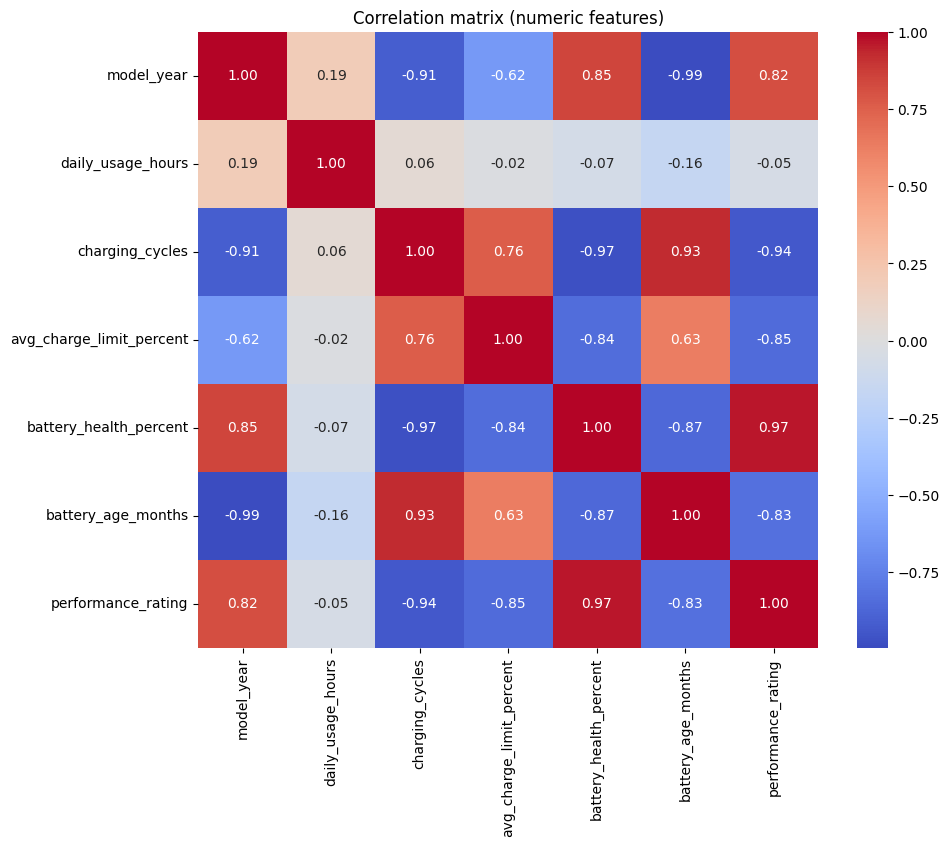

In [28]:
# Correlation matrix
corr = df[num_cols].corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()



performance_rating          1.000000
battery_health_percent      0.965027
model_year                  0.816608
daily_usage_hours          -0.052367
battery_age_months         -0.829650
avg_charge_limit_percent   -0.847415
charging_cycles            -0.938960
Name: performance_rating, dtype: float64


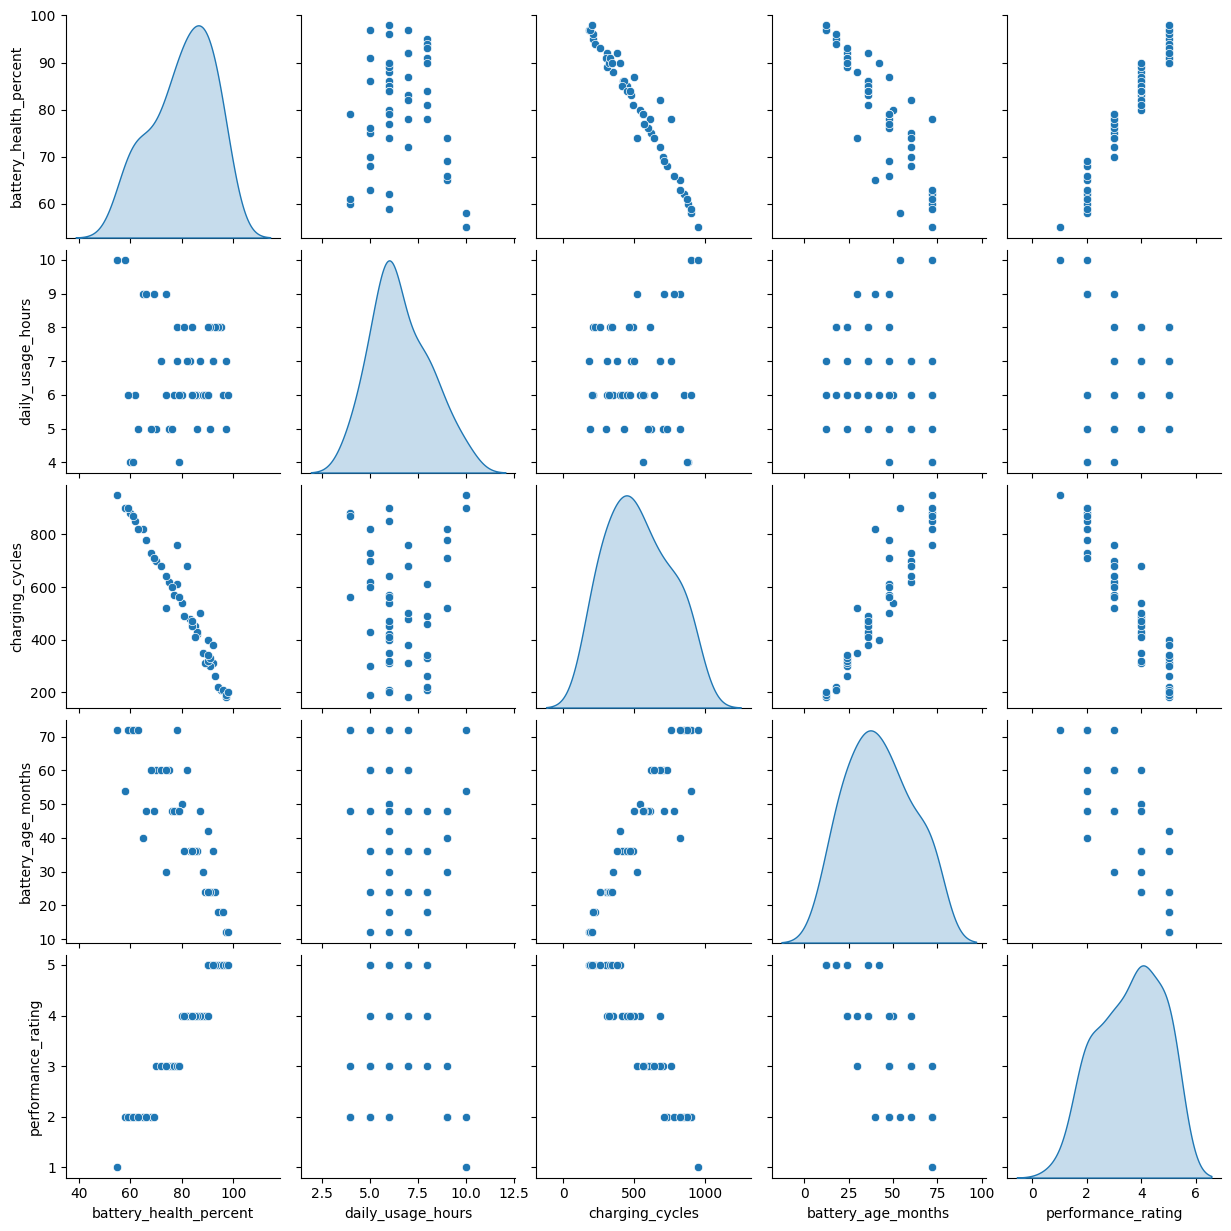

np.float64(-0.9728362697330037)

In [29]:
# Top correlations with target
corr_target = corr[target].sort_values(ascending=False)
print(corr_target)

# Pairplot for a subset of key features
key_cols = ["battery_health_percent", "daily_usage_hours",
            "charging_cycles", "battery_age_months", target]
sns.pairplot(df[key_cols], diag_kind="kde")
plt.show()

# NumPy-style correlation between two arrays
x = df["charging_cycles"].to_numpy()
y = df["battery_health_percent"].to_numpy()
np.corrcoef(x, y)[0, 1]